# Setup

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import morton

OFFSET = 10
FACTOR_MULTIPLY = 10000

df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-30.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/SteeringWheelAngle-30.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)

df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

df

,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,SteeringWhlAngle
0,1663765134,97499,1663765134,97523,1663765134,97449,80109,74925,9.2650,1663765134097449,1663765134,89933,1663765134,89956,1663765134,89884,72089
1,1663765134,197515,1663765134,197539,1663765134,197466,78410,77900,9.6135,1663765134197466,1663765134,189612,1663765134,189635,1663765134,189557,64941
2,1663765134,298027,1663765134,298051,1663765134,297979,76540,76880,9.9195,1663765134297979,1663765134,289909,1663765134,289946,1663765134,289857,57451
3,1663765134,397517,1663765134,397542,1663765134,397467,75945,76880,9.7665,1663765134397467,1663765134,389931,1663765134,389953,1663765134,389879,50136
4,1663765134,497544,1663765134,497568,1663765134,497495,73480,79430,9.5965,1663765134497495,1663765134,489714,1663765134,489737,1663765134,489657,41513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1663765159,598177,1663765159,598202,1663765159,598128,77050,93880,9.6135,1663765159598128,1663765159,590540,1663765159,590563,1663765159,590491,39667
256,1663765159,698606,1663765159,698630,1663765159,698555,76540,93710,9.5965,1663765159698555,1663765159,690445,1663765159,690468,1663765159,690399,37255
257,1663765159,798644,1663765159,798668,1663765159,798595,76370,93880,9.5710,1663765159798595,1663765159,790554,1663765159,790576,1663765159,790506,35781
258,1663765159,898576,1663765159,898599,1663765159,898527,77900,94305,9.6305,1663765159898527,1663765159,890553,1663765159,890574,1663765159,890508,35400


### Morton Indexing

In [27]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))


df['morton'] = df.apply(set_value, axis=1)


In [28]:
morton_values = df['morton']
#morton_values
print(morton_values[0])
print(morton_values[129])
print(morton_values.min())
print(morton_values.max())

'''
We could try to generate all morton values between min and max of the morton values
(corresponding to the limits of the statespace). But, this may not correspond to varying the accel_lat parameter.
Hence, we need to permutate the speed paramter, such that the morton value can realisticly represent a lane change accel_lat.
Hence, we want to find the boundaires of the acccel_lat parameter in tandem with steering angle.

The question then remains: Can we really only vary speed? Would we have to fixate/decide on some constant steering wheel angle
to simplify the problem at hand?
'''

13015111379
16109583077
4360055548
28544217041


'\nWe could try to generate all morton values between min and max of the morton values\n(corresponding to the limits of the statespace). But, this may not correspond to varying the accel_lat parameter.\nHence, we need to permutate the speed paramter, such that the morton value can realisticly represent a lane change accel_lat.\nHence, we want to find the boundaires of the acccel_lat parameter in tandem with steering angle.\n\nThe question then remains: Can we really only vary speed? Would we have to fixate/decide on some constant steering wheel angle\nto simplify the problem at hand?\n'

## Impact of modifying value prior to Morton encoding to Morton value

In [29]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

steer_ang = 64941
lat_accel = 78410

#morton_value = m.pack(78410, 64941)
#print(morton_value)

for i in range(0, 10):
    print('i: ', i, ' | mort: ', m.pack(lat_accel+i**2, steer_ang))
    
print('-------------------------')

for i in range(0, 10):
    print('i: ', i, ' | mort: ', m.pack(lat_accel+i, steer_ang))
    
values = m.unpack(7241898219) 
print(values)
# 78410 - 7241898214
# 78411 - 7241898215
# 78408 - 7241898216
# 78409 - 7241898217
# 78408 - 7241898218
# 78409 - 7241898216

10011001001001011
10011001001001000

# df['morton'] = df.apply(set_value, axis=1)


i:  0  | mort:  7241898214
i:  1  | mort:  7241898215
i:  2  | mort:  7241898230
i:  3  | mort:  7241898407
i:  4  | mort:  7241898470
i:  5  | mort:  7241899175
i:  6  | mort:  7241899254
i:  7  | mort:  7241899495
i:  8  | mort:  7241910502
i:  9  | mort:  7241910759
-------------------------
i:  0  | mort:  7241898214
i:  1  | mort:  7241898215
i:  2  | mort:  7241898226
i:  3  | mort:  7241898227
i:  4  | mort:  7241898230
i:  5  | mort:  7241898231
i:  6  | mort:  7241898402
i:  7  | mort:  7241898403
i:  8  | mort:  7241898406
i:  9  | mort:  7241898407
[78409, 64943]


10011001001001000

### Visualizations

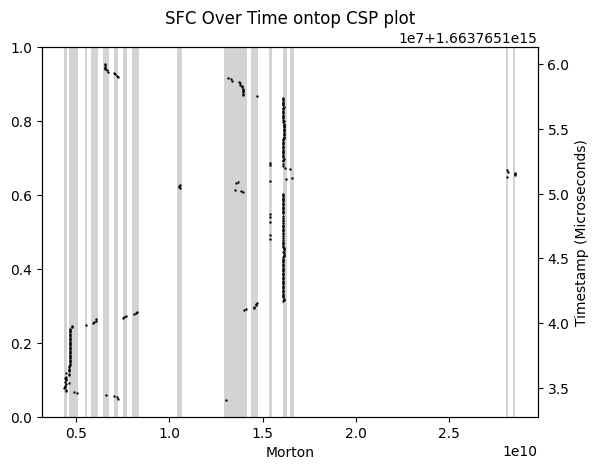

In [30]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')

plt.show()

<Axes: xlabel='ts'>

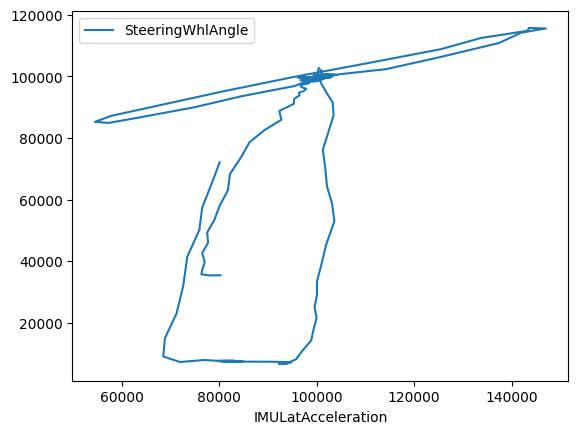

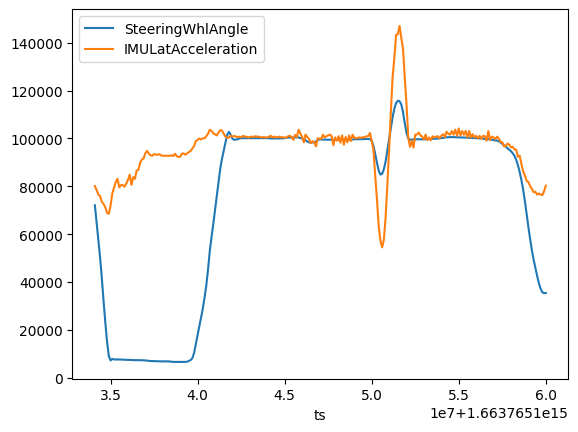

In [31]:
# Plot result
df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
df.plot(x = 'ts', y = ['SteeringWhlAngle', 'IMULatAcceleration'])